<a href="https://colab.research.google.com/github/RichardMedina9309/rmedinaExamen/blob/master/KMeans7A2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cabeceras de algoritmo KMeans

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [4]:
import pandas as pd

In [5]:
dataframe = pd.read_csv('analisis.csv')

In [ ]:
dataframe.head()

In [ ]:
dataframe.describe()

In [8]:
print (dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Graficar el histograma

<ipython-input-9-20defdcd68fe>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


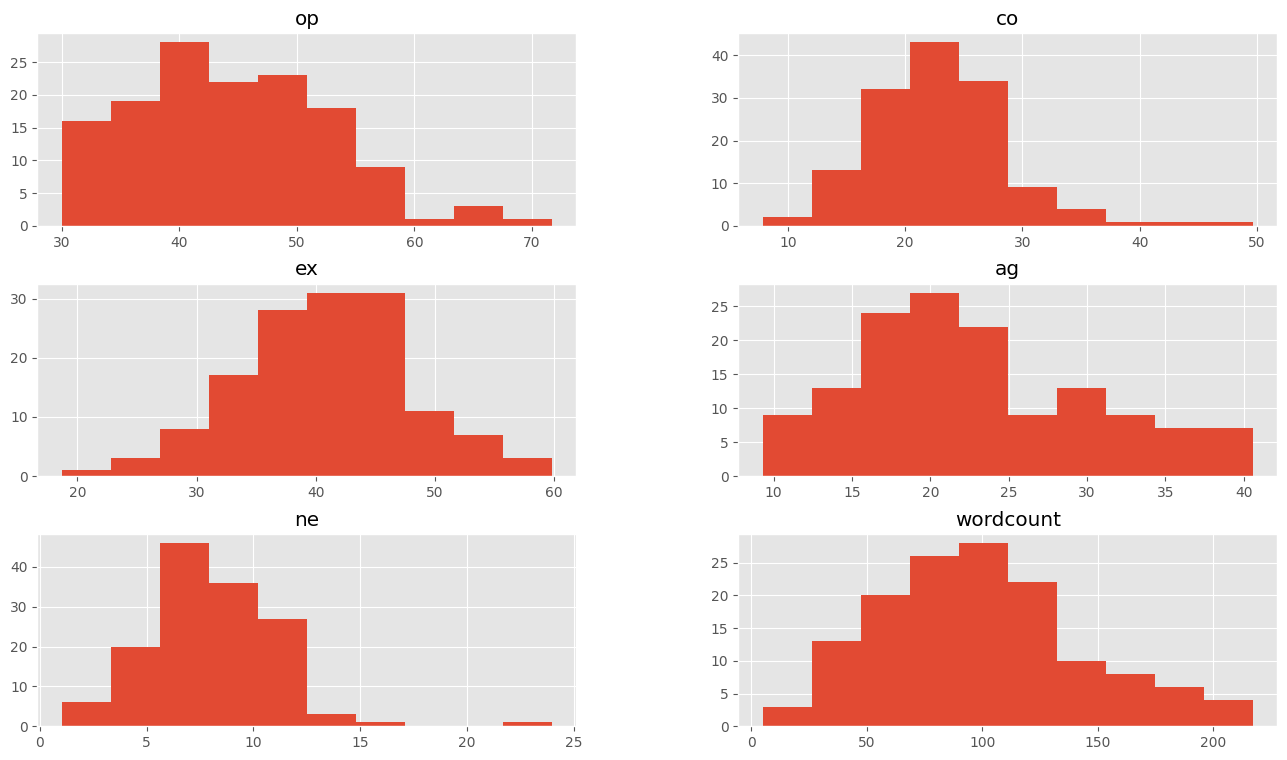

In [9]:
dataframe.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


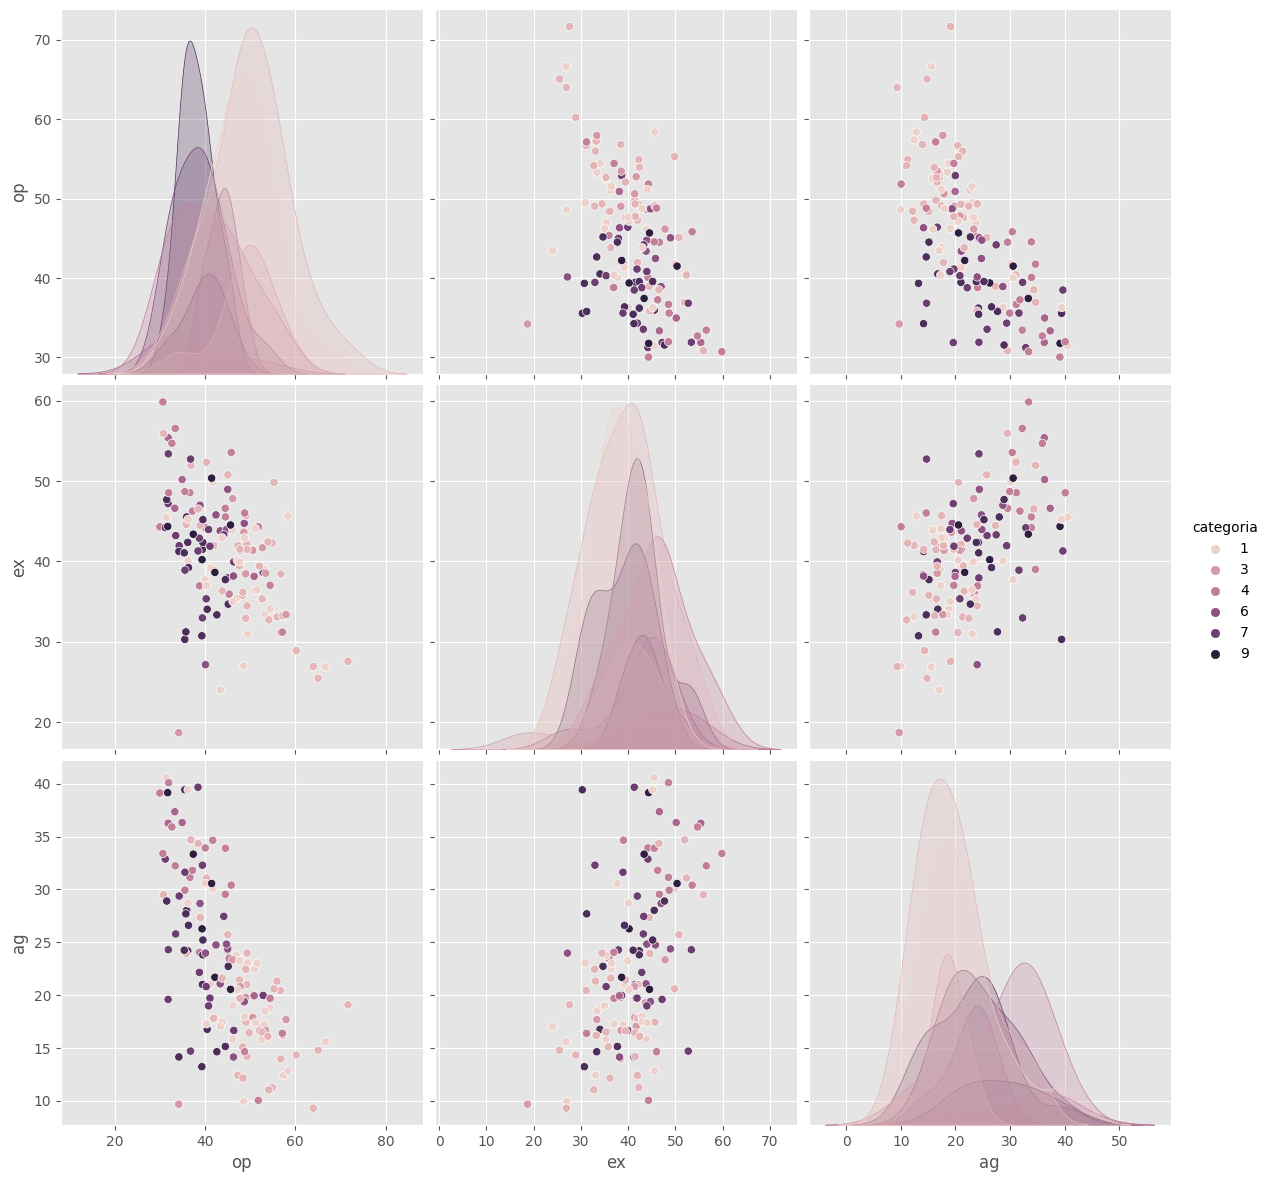

In [10]:
sb.pairplot(dataframe.dropna(), hue= 'categoria', size=4, vars=['op', 'ex', 'ag'], kind='scatter')

In [11]:
X = np.array(dataframe[['op', 'ex', 'ag']])
y = np.array(dataframe['categoria'])

X.shape

(140, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

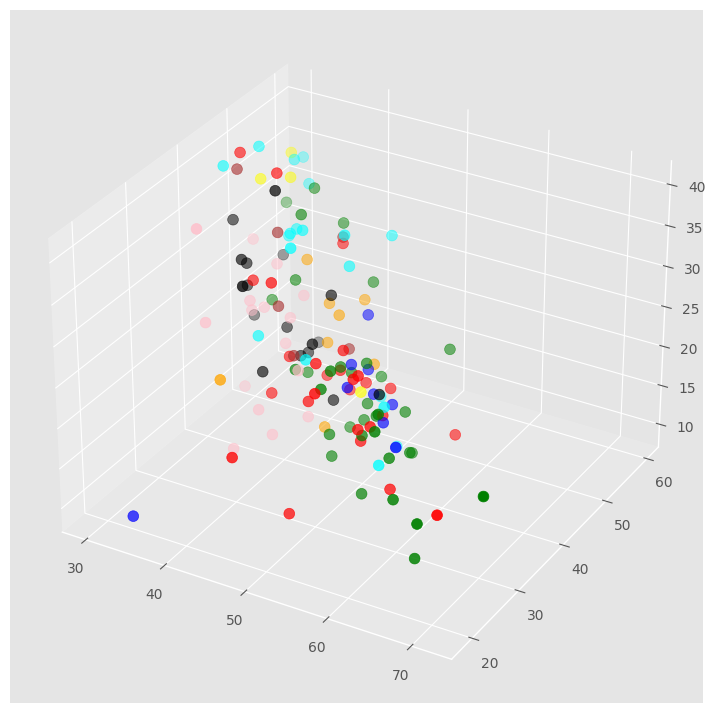

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = []


for filas in y:
  asignar.append(colores[filas])


ax.scatter( X[:,0], X[:,1], X[:,2], c = asignar, s=60)
plt.show


Agrupar por colores

In [ ]:
nc = range(1,20)
kmeans = [KMeans (n_clusters=i) for i in nc]
kmeans

In [ ]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

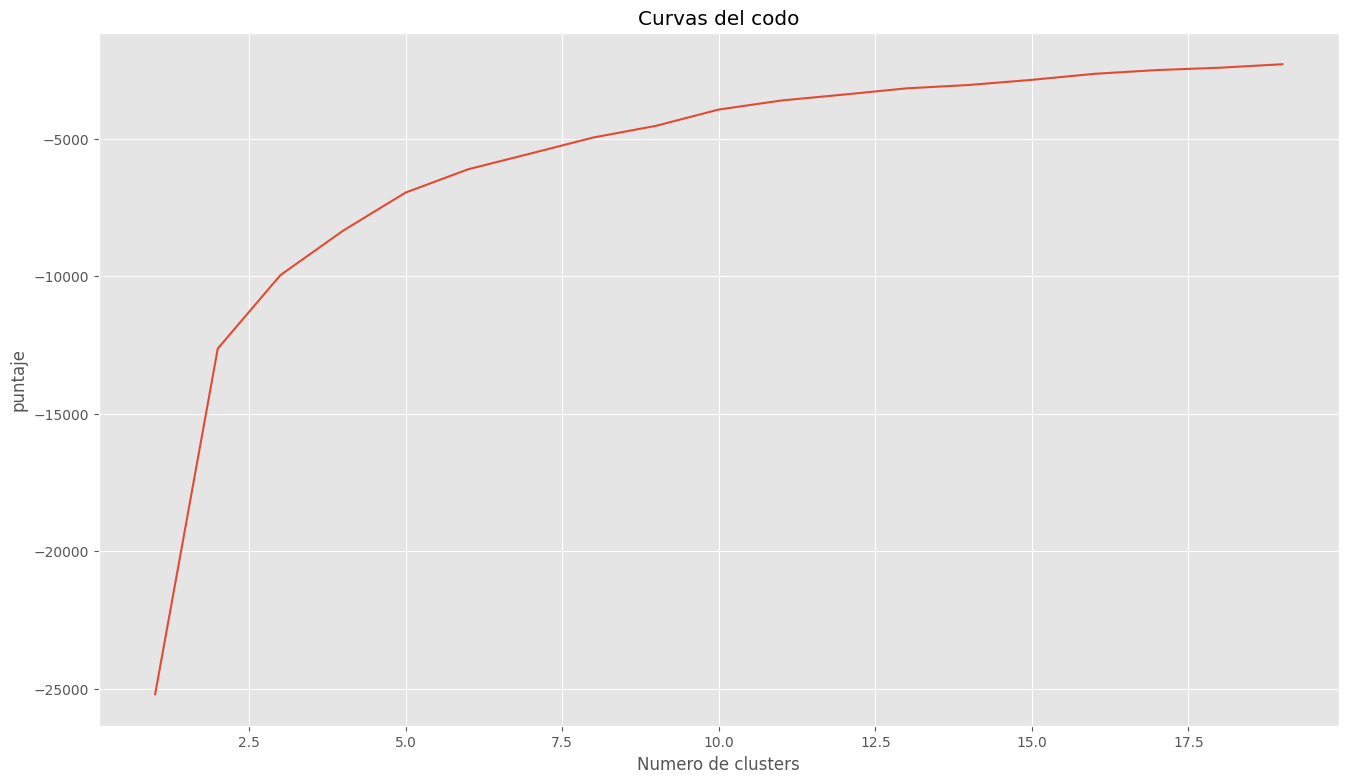

In [17]:
plt.plot(nc,score)

plt.xlabel('Numero de clusters')
plt.ylabel('puntaje')
plt.title('Curvas del codo')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores= ['blue','green','red','yellow','brown','black','orange','pink']
asignar = []

for row in labels:
  asignar.append(colores[row])

fig = plt.figure